# Data Wrangling - WeRateDogs Dataset

#### Table of contents

- Data Gathering


- Data Assessing 


- Data Cleaning

#### Project Motivation

Goal: wrangle WeRateDogs Twitter data to create interesting and trustworthy analyses and visualizations. The Twitter archive is great, but it only contains very basic tweet information. Additional gathering, then assessing and cleaning is required for "Wow!"-worthy analyses and visualizations.

#### Key Points Key points to keep in mind when data wrangling for this project:

Here, we only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets. Assessing and cleaning the entire dataset completely would require a lot of time, and is not necessary to practice and demonstrate your skills in data wrangling. Therefore, we are focusing to assess and clean 8 quality issues and at least 2 tidiness issues in this dataset. Cleaning includes merging individual pieces of data according to the rules of tidy data. The fact that the rating numerators are greater than the denominators does not need to be cleaned. This unique rating system is a big part of the popularity of WeRateDogs.

In [689]:
#importing the required libaries
import pandas as pd
import numpy as np
import tweepy 
import requests
import json
from timeit import default_timer as timer
from tweepy import OAuthHandler

### Gathering the Data

In [690]:
#importing twitter_archive_enhanced.csv 
twitter_archive = pd.read_csv('twitter-archive-master.csv')
twitter_archive.head(2)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 ...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,None,None,None,None


In [691]:
# downloading image_predictions.tsv file programatically
url = "https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"
response = requests.get(url)

with open('image_predictions.tsv', 'wb')as f:
    f.write(response.content)

In [692]:
image_predictions = pd.read_csv('image_predictions.tsv', sep = "\t")

In [693]:
#twitter api key details
consumer_key = '--------------------------------'
consumer_secret = '-----------------------------'
access_token = '--------------------------------'
access_secret = '-------------------------------'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit = True)


- **For the following analysis, I have used the provided file `tweet_json.txt`  as I still didn't get an email from Twitter approving my developer account**

In [694]:
# creating the dataframe for data retrieved using twitter API
twitter_api = pd.DataFrame(columns=['tweet_id', 'retweet_count','favorite_count'])

with open('tweet_json.txt') as f:
    for line in f:
        status = json.loads(line)
        tweet_id = status['id_str']
        retweet_count = status['retweet_count']
        favorite_count = status['favorite_count']
        
        twitter_api = twitter_api.append(pd.DataFrame([[tweet_id, retweet_count, favorite_count]], 
                                       columns = ['tweet_id', 'retweet_count', 'favorite_count']))
twitter_api = twitter_api.reset_index(drop = True)

### Accessing the Data

In [695]:
twitter_archive.head(2)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 ...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,None,None,None,None


In [696]:
twitter_archive.shape

(2356, 17)

In [697]:
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [698]:
twitter_archive.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [699]:
twitter_archive.tweet_id.duplicated().any()

False

In [700]:
image_predictions.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [701]:
image_predictions.shape

(2075, 12)

In [702]:
image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [703]:
image_predictions.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [704]:
image_predictions.tweet_id.duplicated().any()

False

In [705]:
twitter_api.head()

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8665,39034
1,892177421306343426,6366,33430
2,891815181378084864,4226,25197
3,891689557279858688,8770,42399
4,891327558926688256,9548,40552


In [706]:
twitter_api.shape

(2345, 3)

In [707]:
twitter_api.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2345 entries, 0 to 2344
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   tweet_id        2345 non-null   object
 1   retweet_count   2345 non-null   object
 2   favorite_count  2345 non-null   object
dtypes: object(3)
memory usage: 55.1+ KB


In [708]:
twitter_api.describe()

,tweet_id,retweet_count,favorite_count
count,2345,2345,2345
unique,2345,1737,2021
top,708479650088034305,2607,0
freq,1,5,170


In [709]:
twitter_api.tweet_id.duplicated().any()

False

In [710]:
df_twitter_archieve = twitter_archive.copy()
df_image_predictions = image_predictions.copy()
df_twitter_api = twitter_api.copy()

In [711]:
df_twitter_archieve.isnull().sum()

tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
dtype: int64

#### Data Quality Issue 1


- Some features including `reply_to_status_id`, `in_reply_to_user_id`, `retweeted_status_id`, `retweeted_status_user_id`, `retweeted_status_timestamp` have high number of missing values, since they can't help much for this analysis, I have deleted them.

In [712]:
columns = ['in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp']
df_twitter_archieve.drop(columns, inplace=True, axis=1)

#### Data Quality Issue 2


- In `twitter_archieve` table, datatype of the column `timestamp` should be `datatime`


- In `twitter_api` table, all features should have datatype as `int64`

In [713]:
df_twitter_archieve.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_id            2356 non-null   int64 
 1   timestamp           2356 non-null   object
 2   source              2356 non-null   object
 3   text                2356 non-null   object
 4   expanded_urls       2297 non-null   object
 5   rating_numerator    2356 non-null   int64 
 6   rating_denominator  2356 non-null   int64 
 7   name                2356 non-null   object
 8   doggo               2356 non-null   object
 9   floofer             2356 non-null   object
 10  pupper              2356 non-null   object
 11  puppo               2356 non-null   object
dtypes: int64(3), object(9)
memory usage: 221.0+ KB


In [714]:
df_twitter_api.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2345 entries, 0 to 2344
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   tweet_id        2345 non-null   object
 1   retweet_count   2345 non-null   object
 2   favorite_count  2345 non-null   object
dtypes: object(3)
memory usage: 55.1+ KB


In [715]:
df_twitter_archieve.timestamp = pd.to_datetime(df_twitter_archieve.timestamp)
df_twitter_api.retweet_count = df_twitter_api.retweet_count.astype('int64')
df_twitter_api.favorite_count = df_twitter_api.favorite_count.astype('int64')
df_twitter_api.tweet_id = df_twitter_api.tweet_id.astype('int64')


In [716]:
df_twitter_archieve.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2356 non-null   int64              
 1   timestamp           2356 non-null   datetime64[ns, UTC]
 2   source              2356 non-null   object             
 3   text                2356 non-null   object             
 4   expanded_urls       2297 non-null   object             
 5   rating_numerator    2356 non-null   int64              
 6   rating_denominator  2356 non-null   int64              
 7   name                2356 non-null   object             
 8   doggo               2356 non-null   object             
 9   floofer             2356 non-null   object             
 10  pupper              2356 non-null   object             
 11  puppo               2356 non-null   object             
dtypes: datetime64[ns, UTC](1), int64(3

In [717]:
df_twitter_api.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2345 entries, 0 to 2344
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   tweet_id        2345 non-null   int64
 1   retweet_count   2345 non-null   int64
 2   favorite_count  2345 non-null   int64
dtypes: int64(3)
memory usage: 55.1 KB


#### Data Quality issue 3

- The varaible `expanded_urls` in `twitter_archieve` table also has `59` missing values, which means some records had no images. But in our analysis, we are not taking ratings without images.

In [718]:
df_twitter_archieve.expanded_urls.isnull().sum()

59

In [719]:
df_twitter_archieve = df_twitter_archieve.dropna(subset = ['expanded_urls'])

In [720]:
df_twitter_archieve.expanded_urls.isnull().sum()

0

#### Data Quality issue 4


- The `rating numerator` is < 430 many times, but which should not be the case as rating numerator always `>10`, So that is incorrect value for the rating numerator and I chose to replace those values with the mean of the column.

In [721]:
df_twitter_archieve[df_twitter_archieve.rating_numerator<10].rating_numerator.unique()

array([5, 6, 0, 7, 9, 8, 1, 3, 4, 2], dtype=int64)

In [722]:
len(df_twitter_archieve[df_twitter_archieve.rating_numerator<10])

430

In [723]:
np.mean(df_twitter_archieve.rating_numerator)

12.230735742272529

In [724]:
indices = list(df_twitter_archieve.loc[df_twitter_archieve.rating_numerator <= 10].rating_numerator.index)
df_twitter_archieve.loc[indices,'rating_numerator'] = np.mean(df_twitter_archieve.rating_numerator)

In [725]:
len(df_twitter_archieve[df_twitter_archieve.rating_numerator<10])

0

##### Data Quality issue 5

- There are 108 instances where the name of the dog is starting with lower case letter, so to make it consistant, I have capitalized the first letter of these 108 instances.

In [726]:
list(df_twitter_archieve[df_twitter_archieve.name.str.islower()].name)

['such',
 'a',
 'quite',
 'quite',
 'quite',
 'not',
 'one',
 'incredibly',
 'a',
 'mad',
 'an',
 'very',
 'a',
 'very',
 'just',
 'my',
 'one',
 'not',
 'his',
 'one',
 'a',
 'a',
 'a',
 'an',
 'very',
 'actually',
 'a',
 'just',
 'getting',
 'mad',
 'very',
 'this',
 'unacceptable',
 'all',
 'a',
 'old',
 'a',
 'infuriating',
 'a',
 'a',
 'a',
 'an',
 'a',
 'a',
 'very',
 'getting',
 'just',
 'a',
 'the',
 'the',
 'actually',
 'by',
 'a',
 'officially',
 'a',
 'the',
 'the',
 'a',
 'a',
 'a',
 'a',
 'life',
 'a',
 'one',
 'a',
 'a',
 'a',
 'light',
 'just',
 'space',
 'a',
 'the',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'an',
 'a',
 'the',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'quite',
 'a',
 'an',
 'a',
 'an',
 'the',
 'the',
 'a',
 'a',
 'an',
 'a',
 'a',
 'a',
 'a']

In [727]:

df_twitter_archieve['name'] = df_twitter_archieve.name.str.capitalize()

In [728]:
df_twitter_archieve.name.str.islower().sum()

0

##### Data Quality issue 6

- The `rating denominator` is `!=10`  19 time, but which should not be the case as rating denominator always most of the times should be = 10, So that is incorrect value for the `rating denominaor` and I chose to replace those values with the the value `10` in the location where it is not equals to `10`

In [729]:
indices = list(df_twitter_archieve.loc[df_twitter_archieve.rating_denominator != 10].rating_denominator.index)
df_twitter_archieve.loc[indices,'rating_denominator'] = 10

In [730]:
len(df_twitter_archieve[df_twitter_archieve.rating_denominator!=10])

0

In [731]:
indices = list(df_twitter_archieve.loc[df_twitter_archieve.rating_denominator != 10].rating_denominator.index)
df_twitter_archieve.loc[indices,'rating_denominator'] = 10

In [732]:
len(df_twitter_archieve[df_twitter_archieve.rating_denominator!=10])

0

##### Data Quality issue 7

- I felt the `source` column in the `twitter_arhieve` table needs formatting, so I have removing everything unnecessary using regular expression and converted the datatype to `category`

In [733]:
df_twitter_archieve.source

0       <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>
1       <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>
2       <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>
3       <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>
4       <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>
                                               ...                                        
2351    <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>
2352    <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>
2353    <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>
2354    <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>
2355    <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>

In [734]:
df_twitter_archieve.source.dtype

dtype('O')

In [735]:
df_twitter_archieve.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2163
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       32
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

In [736]:
df_twitter_archieve.source = df_twitter_archieve.source.str.replace(r'<(?:a\b[^>]*>|/a>)', '')
df_twitter_archieve.source = df_twitter_archieve.source.astype('category')

In [737]:
df_twitter_archieve.source.value_counts()

Twitter for iPhone     2163
Vine - Make a Scene      91
Twitter Web Client       32
TweetDeck                11
Name: source, dtype: int64

##### Data Quality issue 8

- The column names of `image predictions` tables are explanatore and detailed, so I have modified them so that it is easy to understand.

In [738]:
df_image_predictions.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [739]:
df_image_predictions = df_image_predictions.rename(columns = {'img_num':'image_number',
                        'p1': 'prediction_1',
                        'p1_conf':'prediction_1_confidence',
                        'p1_dog':'prediction_1_dog',
                        'p2': 'prediction_2',
                        'p2_conf':'prediction_2_confidence',
                        'p2_dog':'prediction_2_dog',
                        'p3': 'prediction_3',
                        'p3_conf':'prediction_3_confidence',
                        'p3_dog':'prediction_3_dog'})

In [740]:
df_image_predictions.columns

Index(['tweet_id', 'jpg_url', 'image_number', 'prediction_1',
       'prediction_1_confidence', 'prediction_1_dog', 'prediction_2',
       'prediction_2_confidence', 'prediction_2_dog', 'prediction_3',
       'prediction_3_confidence', 'prediction_3_dog'],
      dtype='object')

#### Tidy Issue1

- We can create a single column as `stage_of_dog` for the columns `doggo`, `floofer`, `pupper`, `puppo` in `twitter_archive` table 

In [741]:
stage_of_dog = ['doggo','pupper', 'floofer', 'puppo' ]
for i in stage_of_dog:
        df_twitter_archieve[i] = df_twitter_archieve[i].replace('None', '')

In [742]:
        
df_twitter_archieve['stage_of_dog'] = df_twitter_archieve.doggo.str.cat(df_twitter_archieve.floofer).str.cat(df_twitter_archieve.pupper).str.cat(df_twitter_archieve.puppo)

# drop the four old colomns
df_twitter_archieve = df_twitter_archieve.drop(['doggo','floofer','pupper','puppo'], axis = 1)

# use np.nan to fill the empty 
df_twitter_archieve['stage_of_dog'] = df_twitter_archieve['stage_of_dog'].replace('', np.nan)

In [743]:
df_twitter_archieve['stage_of_dog'].value_counts()

pupper          243
doggo            80
puppo            28
doggopupper      12
floofer           9
doggofloofer      1
doggopuppo        1
Name: stage_of_dog, dtype: int64

In [744]:
df_image_predictions.head()

,tweet_id,jpg_url,image_number,prediction_1,prediction_1_confidence,prediction_1_dog,prediction_2,prediction_2_confidence,prediction_2_dog,prediction_3,prediction_3_confidence,prediction_3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [745]:
df_twitter_archieve.head(1)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,stage_of_dog
0,892420643555336193,2017-08-01 16:23:56+00:00,Twitter for iPhone,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13.0,10,Phineas,NaN


In [746]:
df_twitter_api.head()

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8665,39034
1,892177421306343426,6366,33430
2,891815181378084864,4226,25197
3,891689557279858688,8770,42399
4,891327558926688256,9548,40552


#### Tidy Issue2

- `twitter_archieve` and `twitter_api` should become a single table as they both are providing the tweet information.

In [747]:
df_twitter_archieve = pd.merge(df_twitter_archieve, df_twitter_api, on='tweet_id', how = 'inner')

In [748]:
df_twitter_archieve.to_csv('twitter_archive_enhanced.csv', encoding='utf-8')

## Visualizing Data 

In [749]:
df_twitter_archieve.head(2)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,stage_of_dog,retweet_count,favorite_count
0,892420643555336193,2017-08-01 16:23:56+00:00,Twitter for iPhone,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13.0,10,Phineas,NaN,8665,39034
1,892177421306343426,2017-08-01 00:17:27+00:00,Twitter for iPhone,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 ...",https://twitter.com/dog_rates/status/892177421306343426/photo/1,13.0,10,Tilly,NaN,6366,33430


In [750]:
df_twitter_archieve.columns

Index(['tweet_id', 'timestamp', 'source', 'text', 'expanded_urls',
       'rating_numerator', 'rating_denominator', 'name', 'stage_of_dog',
       'retweet_count', 'favorite_count'],
      dtype='object')

In [751]:
df_twitter_archieve.source.value_counts()

Twitter for iPhone     2152
Vine - Make a Scene      91
Twitter Web Client       32
TweetDeck                11
Name: source, dtype: int64

In [752]:
#creating a function for barplot as I have used bar plot a lot in this analysis

def bar_plot(variable, xlabel, ylabel, title):
    plt.figure(figsize = (9,6))
    variable.value_counts().plot(kind = 'bar')
    plt.xlabel(xlabel, fontsize = 12)
    plt.ylabel(ylabel, fontsize = 12)
    plt.title(title, fontsize = 15)

In [753]:
plt.figure(figsize = (9,6))
bin_edges = np.arange(df[df.win_by_runs != 0].win_by_runs.min(), df[df.win_by_runs != 0].win_by_runs.max()+3, 3);
df[df.win_by_runs != 0].win_by_runs.hist(bins = bin_edges);
plt.title('Distribution of Winning Runs\n', fontsize = 15);
plt.xlabel('\nWinning Runs', fontsize = 12);
plt.ylabel('Frequency', fontsize = 12);

NameError: name 'df' is not defined

<Figure size 648x432 with 0 Axes>

In [754]:
import matplotlib.pyplot as plt
%matplotlib inline

## Insights

#### What is the frequent type of source ?

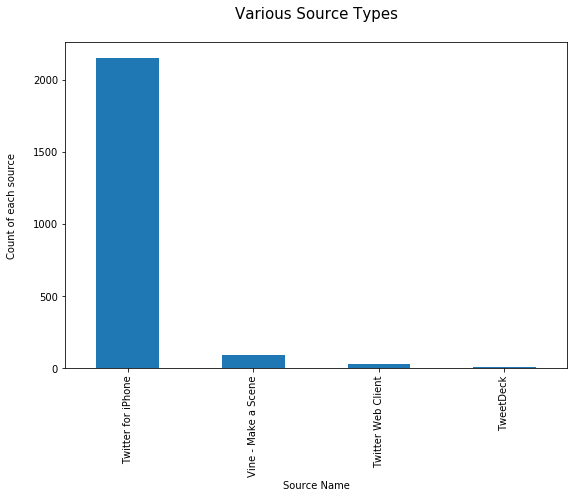

In [755]:
#creating bar plot using value_counts() function

plt.figure(figsize = (9,6))
df_twitter_archieve.source.value_counts().sort_values(ascending = False).plot(kind = 'bar');
plt.xlabel('Source Name', fontsize = 10);
plt.ylabel('Count of each source\n',  fontsize = 10);
plt.title('Various Source Types\n', fontsize = 15);

#### Insight


Out of the four sources, `Twitter for iPhone` used most of the times as source and there is huge difference between this and other 3 types of sources.

#### What is the frequent type of dog stage ?

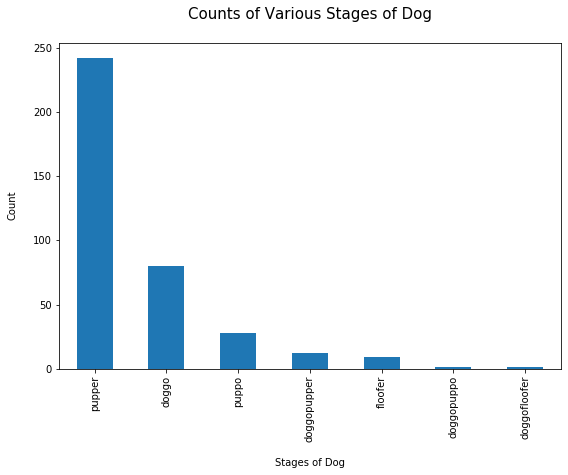

In [756]:
#creating bar plot using value_counts() function

plt.figure(figsize = (9,6))
df_twitter_archieve.stage_of_dog.value_counts().sort_values(ascending = False).plot(kind = 'bar');
plt.xlabel('\nStages of Dog', fontsize = 10);
plt.ylabel('Count\n',  fontsize = 10);
plt.title('Counts of Various Stages of Dog\n', fontsize = 15);

#### Insight

- Most of the dogs are in the stage of `pupper` and the least are `doggofloofer`

#### Correlation coeffient between the features

In [757]:
corr = df_twitter_archieve.corr()

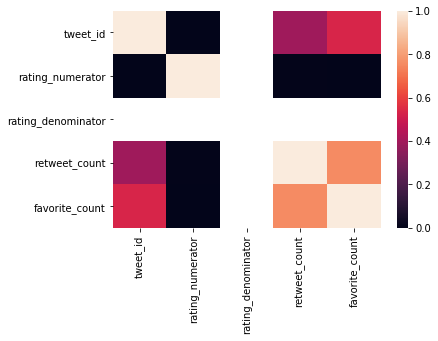

In [758]:
import seaborn as sns
sns.heatmap(corr)

#### Insight

- `rating_numerator` and `retweet_count` are highly correlated 


- `rating_numerator` has very small correlation with `favourite_count`, `retweet_count`

#### Average `retweet_count` for various stages of dog

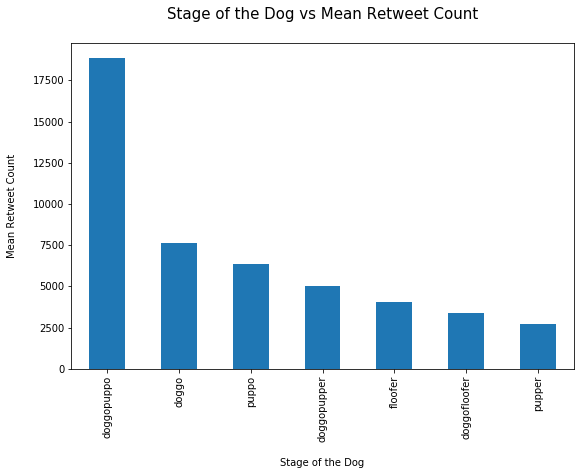

In [759]:
plt.figure(figsize = (9,6))
df_twitter_archieve.groupby('stage_of_dog')['retweet_count'].mean().sort_values(ascending  = False).plot(kind = 'bar')
plt.xlabel('\nStage of the Dog', fontsize = 10);
plt.ylabel('Mean Retweet Count\n', fontsize = 10);
plt.title('Stage of the Dog vs Mean Retweet Count\n', fontsize = 15);

#### Insight

- `doggopuppo` stage has the hight mean average of `retweet_count` whereas `pupper` has the least

#### Average `following_count` for various stages of dog

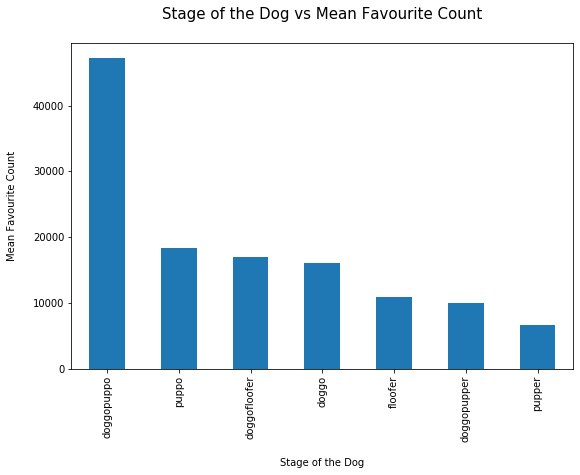

In [760]:
plt.figure(figsize = (9,6))
df_twitter_archieve.groupby('stage_of_dog')['favorite_count'].mean().sort_values(ascending  = False).plot(kind = 'bar')
plt.xlabel('\nStage of the Dog', fontsize = 10);
plt.ylabel('Mean Favourite Count\n', fontsize = 10);
plt.title('Stage of the Dog vs Mean Favourite Count\n', fontsize = 15);

#### Insight

- `doggopuppo` stage has the hight mean average of `favourite_Count` whereas `pupper` has the least